   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

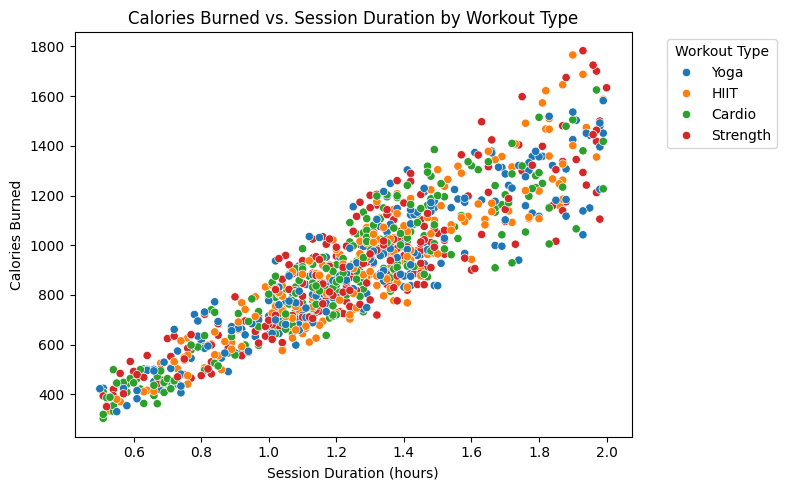

/var/folders/gt/ydrlpjfd1zndmxttsk32hvb80000gn/T/ipykernel_72738/1728746365.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experience_Level', y='Max_BPM', data=data, palette='Set2')


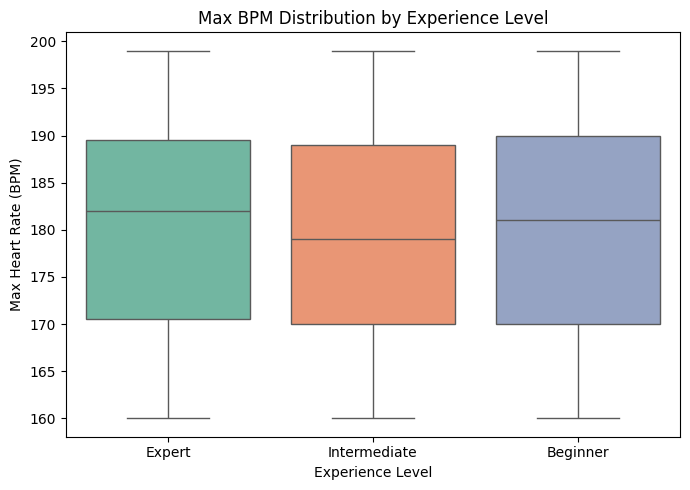

/var/folders/gt/ydrlpjfd1zndmxttsk32hvb80000gn/T/ipykernel_72738/1728746365.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=data, estimator='mean', ci=None)


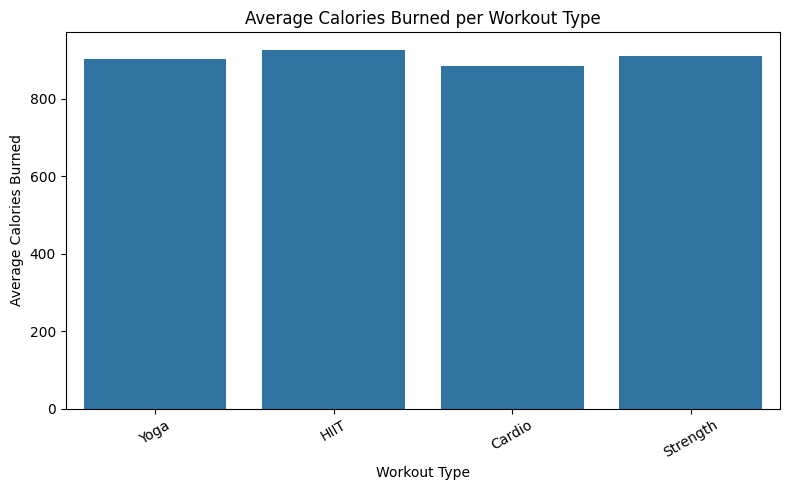

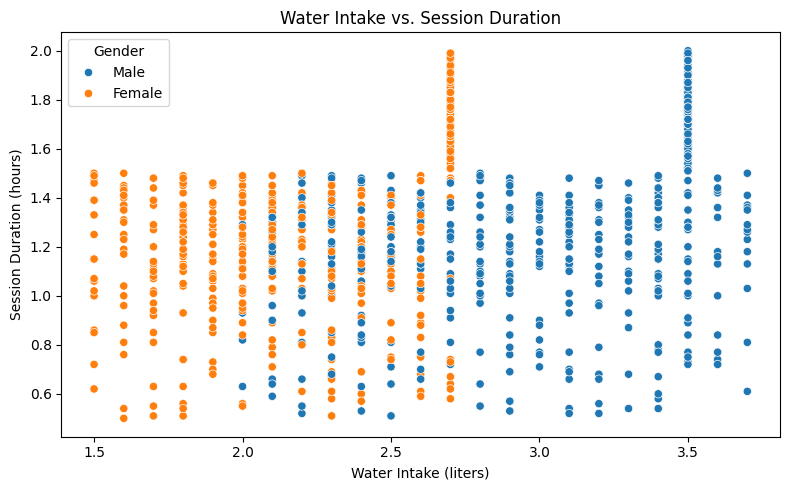

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv("gym_members_exercise.csv")

# Preview the dataset
print(data.head())

# --- Cleaning the Data ---

# Drop any rows with missing values in critical columns
data = data.dropna(subset=['Calories_Burned', 'Session_Duration (hours)', 'Workout_Type', 
                           'Experience_Level', 'Avg_BPM', 'Max_BPM', 'Gender'])

# Convert experience level to categorical for plotting
data['Experience_Level'] = data['Experience_Level'].map({1: 'Beginner', 2: 'Intermediate', 3: 'Expert'})

# Recalculate BMI to validate the existing column (optional)
data['Calculated_BMI'] = data['Weight (kg)'] / (data['Height (m)'] ** 2)

# Round for comparison
data['Calculated_BMI'] = data['Calculated_BMI'].round(2)
data['BMI'] = data['BMI'].round(2)

# --- Exploratory Data Analysis ---

# 1. Calories Burned vs. Session Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', data=data)
plt.title("Calories Burned vs. Session Duration by Workout Type")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Max BPM by Experience Level
plt.figure(figsize=(7, 5))
sns.boxplot(x='Experience_Level', y='Max_BPM', data=data, palette='Set2')
plt.title("Max BPM Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Max Heart Rate (BPM)")
plt.tight_layout()
plt.show()

# 3. Average Calories Burned by Workout Type
plt.figure(figsize=(8, 5))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=data, estimator='mean', ci=None)
plt.title("Average Calories Burned per Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Average Calories Burned")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 4. Water Intake vs. Session Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Water_Intake (liters)', y='Session_Duration (hours)', hue='Gender', data=data)
plt.title("Water Intake vs. Session Duration")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Session Duration (hours)")
plt.tight_layout()
plt.show()
